In [1]:
!pip install wbdata

import pandas as pd
import wbdata
import numpy as np
import re 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import matplotlib.patches as mpatches

In [2]:
wbdata.get_source()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  24  Poverty and Equity
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclus

In [39]:
SOURCE=16
indicators = wbdata.get_indicator(source=SOURCE)
indicators

id                    name
--------------------  -------------------------------------------------------------------------------------------------------------------------------
HD.HCI.OVRL           Human Capital Index (HCI) (scale 0-1)
HD.HCI.OVRL.FE        Human Capital Index (HCI), Female (scale 0-1)
HD.HCI.OVRL.LB        Human Capital Index (HCI), Lower Bound (scale 0-1)
HD.HCI.OVRL.LB.FE     Human Capital Index (HCI), Female, Lower Bound (scale 0-1)
HD.HCI.OVRL.LB.MA     Human Capital Index (HCI), Male, Lower Bound (scale 0-1)
HD.HCI.OVRL.MA        Human Capital Index (HCI), Male (scale 0-1)
HD.HCI.OVRL.UB        Human Capital Index (HCI), Upper Bound (scale 0-1)
HD.HCI.OVRL.UB.FE     Human Capital Index (HCI), Female, Upper Bound (scale 0-1)
HD.HCI.OVRL.UB.MA     Human Capital Index (HCI), Male, Upper Bound (scale 0-1)
NY.GNP.PCAP.CD        GNI per capita, Atlas method (current US$)
SE.ADT.1524.LT.FM.ZS  Literacy rate, youth (ages 15-24), gender parity index (GPI)
SE.ADT.1524.LT.

In [106]:
chn_fr = wbdata.get_dataframe({'SH.DTH.NMRT':'Mortality rate, under-5 (per 1,000 live births)',
                              'SH.DYN.MORT.FE':'Mortality rate, under-5, female (per 1,000 live births)',
                              'SH.DYN.MORT.MA':'Mortality rate, under-5, male (per 1,000 live births)'}, country='CHN')
chn_fr.index = chn_fr.index.astype(int)
chn_fr.index = chn_fr.index.rename('year')
chn_fr = chn_fr.drop([2019, 2020])
chn_fr.head()

,"Mortality rate, under-5 (per 1,000 live births)","Mortality rate, under-5, female (per 1,000 live births)","Mortality rate, under-5, male (per 1,000 live births)"
year,,,
2018,70170.0,8.0,9.0
2017,77398.0,8.6,9.7
2016,85305.0,9.3,10.5
2015,93912.0,10.0,11.4
2014,103120.0,10.8,12.3


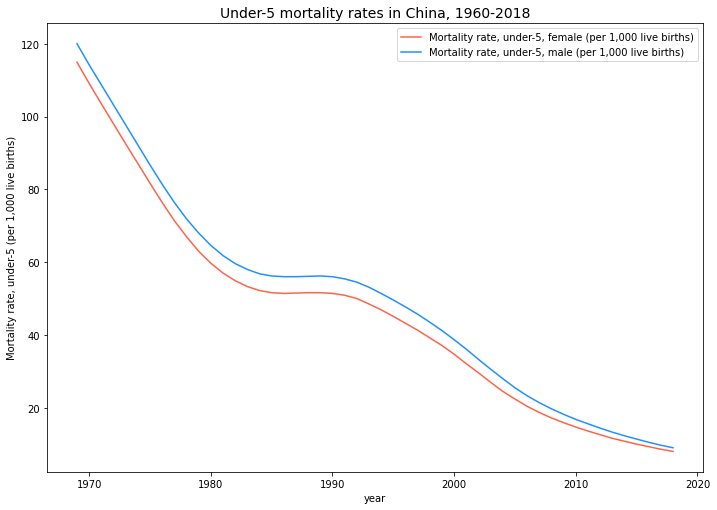

In [108]:
fig = plt.figure(figsize=(11.75,8.25))
ax = plt.axes()


plt.plot(chn_fr.index, chn_fr.iloc[:, 1], color='tomato')
plt.plot(chn_fr.index, chn_fr.iloc[:, 2], color='dodgerblue')

ax.legend(chn_fr.columns[1:])
plt.xlabel('year')
plt.ylabel('Mortality rate, under-5 (per 1,000 live births)')
plt.title('Under-5 mortality rates in China, 1960-2018', fontdict={'fontsize':14})
plt.show();

In [114]:
chn_pop = wbdata.get_dataframe({'SP.POP.TOTL.FE.IN':'Population, female',
                               'SP.POP.TOTL.MA.IN':'Population, male',
                               'SP.POP.0004.FE':'Population ages 00-04, female',
                               'SP.POP.0004.MA':'Population ages 00-04, male'}, country='CHN')
chn_pop.index = chn_pop.index.astype(int)
chn_pop.index = chn_pop.index.rename('year')
chn_pop.drop([2020]).head()

,"Population, female","Population, male","Population ages 00-04, female","Population ages 00-04, male"
year,,,,
2019,680596325.0,717118675.0,38930156.0,43971560.0
2018,677972245.0,714757755.0,39307468.0,44502954.0
2017,674707818.0,711687182.0,39542519.0,44885574.0
2016,670780903.0,707884097.0,39596016.0,45125907.0
2015,667009225.0,704210775.0,39474973.0,45261623.0


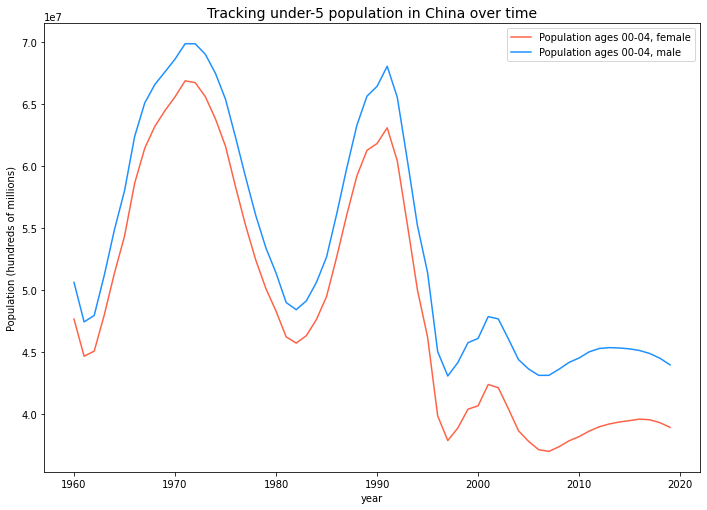

In [123]:
fig = plt.figure(figsize=(11.75,8.25))
ax = plt.axes()


plt.plot(chn_pop.index, chn_pop.iloc[:, 2], color='tomato')
plt.plot(chn_pop.index, chn_pop.iloc[:, 3], color='dodgerblue')

ax.legend(chn_pop.columns[2:])
plt.xlabel('year')
plt.ylabel('Population (hundreds of millions)')
plt.title('Tracking under-5 population in China over time', fontdict={'fontsize':14})
plt.show();